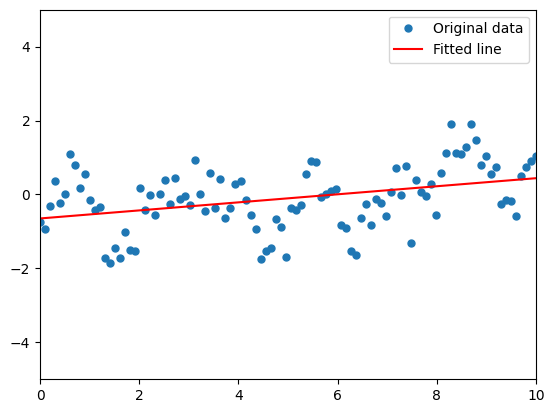

In [17]:
# Data4Regression.xlsx 读取数据，进行拟合
# Data4Regression.xlsx 有两列数据，第一列是x，第二列是y

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel('Data4Regression.xlsx')
x = data['x'].values
y = data['y_complex'].values

# 拟合方法一：最小二乘法
A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.plot(x, y, '.', label='Original data', markersize=10)
plt.plot(x, a1 * x + b1, 'r', label='Fitted line')
plt.legend()
plt.show()

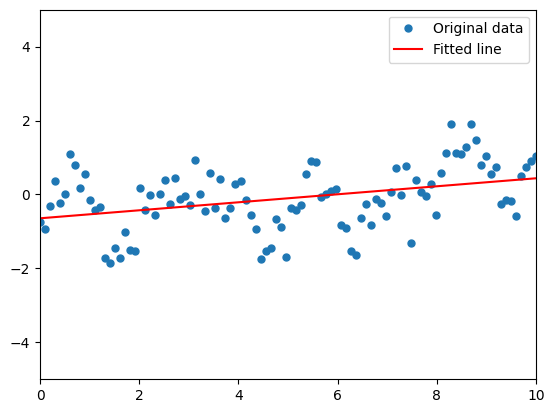

In [2]:
# 拟合方法二：梯度下降法
def gradient_descent(x, y, a, b, lr, epochs):
    for _ in range(epochs):
        a_grad = 2 * np.mean((a * x + b - y) * x)
        b_grad = 2 * np.mean(a * x + b - y)
        a -= lr * a_grad
        b -= lr * b_grad
    return a, b

a2, b2 = gradient_descent(x, y, 0, 0, 0.01, 1000)
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.plot(x, y, '.', label='Original data', markersize=10)
plt.plot(x, a2 * x + b2, 'r', label='Fitted line')
plt.legend()
plt.show()

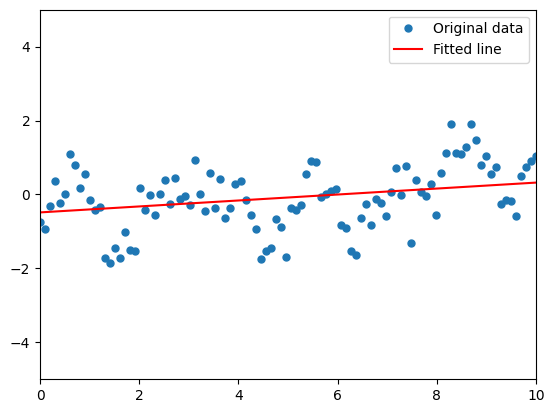

In [3]:
# 拟合方法三：牛顿法
def newton(x, y, a, b, lr, epochs):
    for _ in range(epochs):
        a_grad = 2 * np.mean((a * x + b - y) * x)
        b_grad = 2 * np.mean(a * x + b - y)
        a_hess = 2 * np.mean(x ** 2)
        b_hess = 2
        a -= lr * a_grad / a_hess
        b -= lr * b_grad / b_hess
    return a, b

a3, b3 = newton(x, y, 0, 0, 0.01, 1000)
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.plot(x, y, '.', label='Original data', markersize=10)
plt.plot(x, a3 * x + b3, 'r', label='Fitted line')
plt.legend()
plt.show()

In [167]:
# 拟合方法四：使用MLP
import torch
from torch import nn

net = nn.Sequential(nn.Linear(1,256),nn.ReLU(),
                    nn.Linear(256,256),nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(256,256),nn.ReLU(),
                    nn.Dropout(0.3),
                    nn.Linear(256,256),nn.ReLU(),
                    nn.Dropout(0.4),
                    nn.Linear(256,256),nn.ReLU(),
                    nn.Dropout(0.5),
                    nn.Linear(256,128),nn.ReLU(),
                    nn.Dropout(0.6),
                    nn.Linear(128,32),nn.ReLU(),
                    nn.Linear(32,1))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight)

net.apply(init_weights)
batch_size, lr, num_epochs = (64, 0.0001, 5000)
loss = nn.MSELoss()
trainer = torch.optim.Adam(net.parameters(), lr=lr)
dataset = torch.utils.data.TensorDataset(torch.tensor(x).unsqueeze(1).float(), torch.tensor(y).unsqueeze(1).float())
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

for _ in range(num_epochs):
    for X, y1 in train_iter:
        l = loss(net(X), y1)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    
    l = loss(net(torch.tensor(x).unsqueeze(1).float()), torch.tensor(y).unsqueeze(1).float())
    print(f'epoch {_ + 1}, loss {l}')


epoch 1, loss 0.9692077040672302
epoch 2, loss 0.9039884209632874
epoch 3, loss 0.9243196249008179
epoch 4, loss 0.8428349494934082
epoch 5, loss 0.8887001276016235
epoch 6, loss 0.8506801128387451
epoch 7, loss 0.8588985204696655
epoch 8, loss 0.8308475017547607
epoch 9, loss 0.781139075756073
epoch 10, loss 0.8585474491119385
epoch 11, loss 0.8249573707580566
epoch 12, loss 0.7837798595428467
epoch 13, loss 0.7739489674568176
epoch 14, loss 0.8139064311981201
epoch 15, loss 0.7228509783744812
epoch 16, loss 0.7108253240585327
epoch 17, loss 0.8045071363449097
epoch 18, loss 0.8138648867607117
epoch 19, loss 0.8037563562393188
epoch 20, loss 0.7781977653503418
epoch 21, loss 0.8010197281837463
epoch 22, loss 0.815555214881897
epoch 23, loss 0.7364934682846069
epoch 24, loss 0.7667756080627441
epoch 25, loss 0.8066455125808716
epoch 26, loss 0.7642662525177002
epoch 27, loss 0.8242514729499817
epoch 28, loss 0.7863216996192932
epoch 29, loss 0.7557674646377563
epoch 30, loss 0.75283503

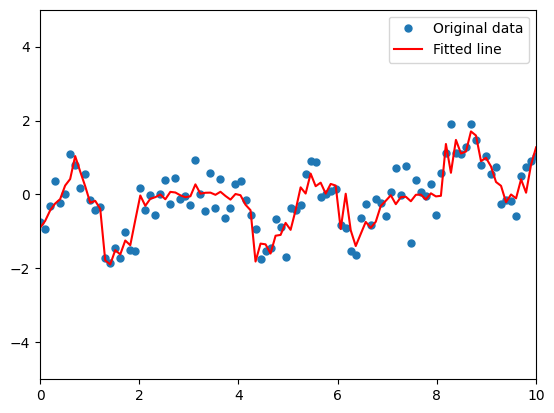

In [168]:
y_hat = net(torch.tensor(x).unsqueeze(1).float()).detach().numpy()
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.plot(x, y, '.', label='Original data', markersize=10)
plt.plot(x, y_hat, 'r', label='Fitted line')
plt.legend()
plt.show()

In [169]:
# 打印结果
print(a1,b1)
print(a2,b2)
print(a3,b3)

# 计算误差
y1 = a1 * x + b1
y2 = a2 * x + b2
y3 = a3 * x + b3
y4 = y_hat.flatten()
print(np.mean((y1 - y) ** 2))
print(np.mean((y2 - y) ** 2))
print(np.mean((y3 - y) ** 2))
print(np.mean((y4 - y) ** 2))

0.10894738685803713 -0.6487466967301856
0.10827265618339714 -0.6442592675352024
0.08065210903038995 -0.48497182098140834
0.6134024281450051
0.6134075391306283
0.6207062918529508
0.18189187397903886


In [170]:
# 读取测试集
test_data = pd.read_excel('TestData.xlsx')
test_x, test_y = test_data['x_new'].values, test_data['y_new_complex'].values
test_y1 = a1 * test_x + b1
test_y2 = a2 * test_x + b2
test_y3 = a3 * test_x + b3
test_y4 = net(torch.tensor(test_x).unsqueeze(1).float()).detach().numpy().flatten()
print(np.mean((test_y1 - test_y) ** 2))
print(np.mean((test_y2 - test_y) ** 2))
print(np.mean((test_y3 - test_y) ** 2))
print(np.mean((test_y4 - test_y) ** 2))

0.5950433861467296
0.5948522164079428
0.598094522943877
0.2791204527382899
